In [1]:
import sys

sys.path.append("..")

import matplotlib.pyplot as plt
from covid_ct.dataset import process_slice
from utils.utils import load_df
import numpy as np
import cv2 as cv
from covid_ct.dataset.body_mask import get_body_mask
from covid_ct.dataset.bone_mask import get_bone_mask
from covid_ct.dataset.localizer import align_features, crop_localizer, get_feature
from utils.ct import project, to_8bit
from utils.cv import concat, crop
from utils.dicom import normalize_hu, read_dcm
from utils.utils import load_df, save_img, track
from typing import Collection, Iterable, List, Tuple, Union, cast
from utils.plot import plot

df = load_df("covid_ct_test.pkl")
item = df[["lung", "localizer"]].values.tolist()[0]


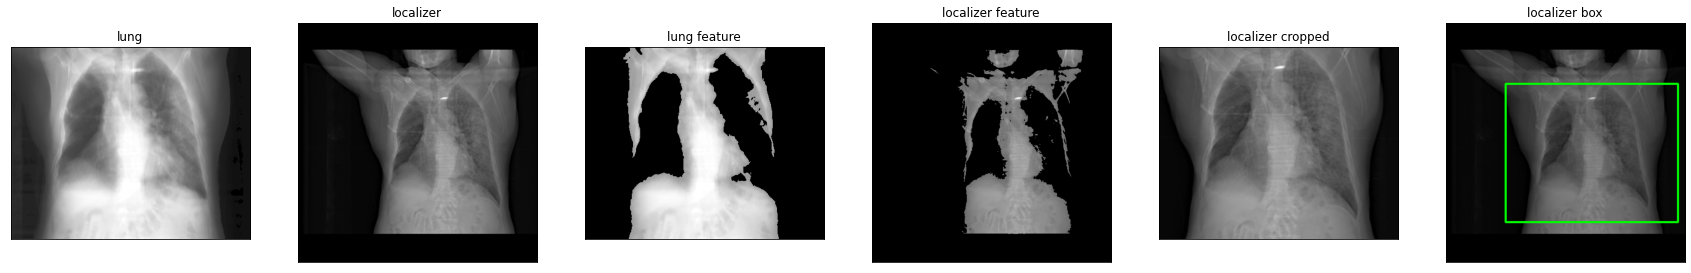

In [2]:
# Read inputs
lung_3d = normalize_hu(read_dcm(list(item[0])))
loc_2d = normalize_hu(read_dcm(list(item[1]))[0])

# Get localizer
lung_frontal_2d = project(lung_3d)
lung_feature_2db = get_feature(lung_frontal_2d, percentage=40)
loc_feature_2db = get_feature(loc_2d, percentage=20)

feature_coords = align_features(lung_feature_2db, loc_feature_2db)
loc_cropped_2d, loc_box_2d = crop_localizer(loc_2d, feature_coords)

plot(
    [
        lung_frontal_2d,
        loc_2d,
        lung_feature_2db,
        loc_feature_2db,
        loc_cropped_2d,
        loc_box_2d,
    ],
    [
        "lung",
        "localizer",
        "lung feature",
        "localizer feature",
        "localizer cropped",
        "localizer box",
    ],
)


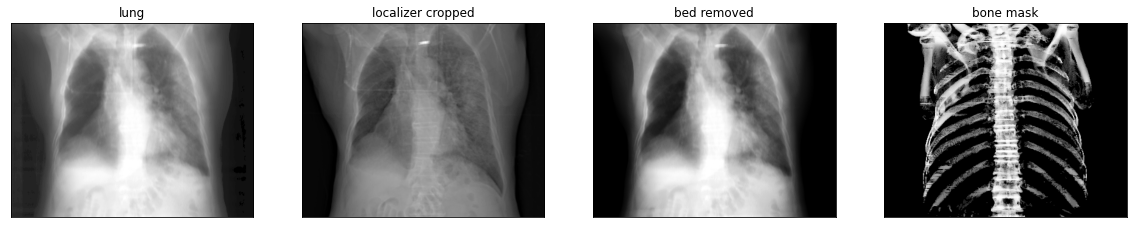

In [3]:
(
    body_3d,
    bones_3db,
    body_thres_3db,
    body_contour_3db,
    bones_thres_3db,
    bones_contour_3db,
) = zip(*[process_slice(lung_2d) for lung_2d in lung_3d])

body_2d = project(body_3d)
bones_2d = project(bones_3db)

plot(
    [
        lung_frontal_2d,
        loc_cropped_2d,
        body_2d,
        bones_2d
    ],
    [
        "lung",
        "localizer cropped",
        "bed removed",
        "bone mask",
    ],
)
